In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [9]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [7]:
y

array([2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1,
       2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2,
       0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2,
       0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2,

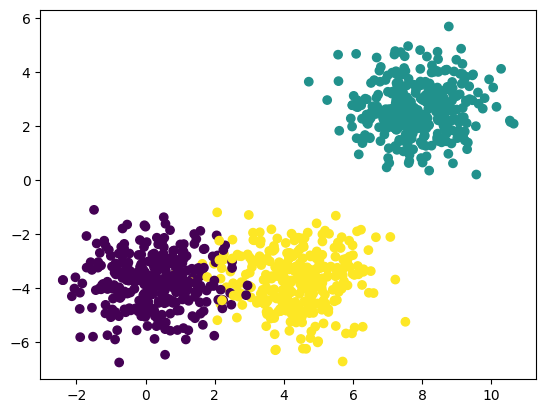

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [14]:
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [19]:
from sklearn.cluster import KMeans

kcss = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++')
    Kmeans.fit(X_train_scaled)
    kcss.append(Kmeans.inertia_)


In [20]:
kcss

[1599.9999999999998,
 368.16400578106044,
 149.4127486581483,
 127.20697977535941,
 115.87033479345638,
 97.12356208939057,
 91.9177173987026,
 76.69304638800239,
 64.96469526410988,
 60.63155721760559]

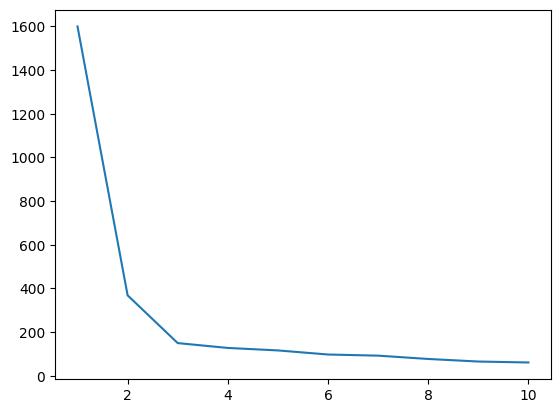

In [21]:
plt.plot(range(1,11),kcss)


In [22]:
!pip install kneed

In [23]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11), kcss , curve='convex', direction='decreasing')

In [26]:
print(kl.elbow)

3
